<a href="https://colab.research.google.com/github/pankajjindal/DailyCoding/blob/master/bostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving housing.csv to housing.csv
User uploaded file "housing.csv" with length 49082 bytes


In [10]:
!ls -ltr

total 52
drwxr-xr-x 1 root root  4096 Jan 31 17:15 sample_data
-rw-r--r-- 1 root root 49082 Feb  3 12:10 housing.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
df = pd.read_csv('housing.csv',sep='\s+',header=None)

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's

In [0]:
df.columns = ['CRIM' ,'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']  
   

In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


Text(0.5, 1.0, 'data.corr()')

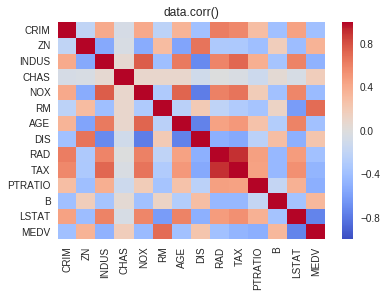

In [17]:
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('data.corr()')

In [0]:
from sklearn import linear_model
def model_behaviour(df, features, target):
  
    y = df[target]
    X = df[features]
    
    model = linear_model.LinearRegression()
    
    model.fit(X, y)
    
    y_hat = model.predict(X)
    
    cost = get_loss(y_hat, y)
    
    C0 = model.intercept_
    Cs = model.coef_  
    equation = str(np.round(C0))
    for i in range(len( Cs)):
       equation += " + " + str(np.round(Cs[i])) + "*" + features[i]
    print ("y = ", equation)
    print("RMSE = {:.0f}".format(cost))

    return cost

    
    

In [0]:
import numpy as np
def get_loss(yhat, target):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    target -- vector of size m (true labels)
    
    Returns:
    loss -- the value of the L2 loss function
    """
      # compute the residuals (since we are squaring it doesn't matter 
      #   which order you subtract)
      # np.dot will square the residuals and add them up
    cost = np.dot((target - yhat), (target - yhat))/len(yhat)

    return(np.sqrt(cost))

In [20]:
y = df['MEDV']
mean = sum(y)/len(y)
print("Model Errors for Mean")
print("RMSE = {:.0f}".format(get_loss(y,mean)))

Model Errors for Mean
RMSE = 9


In [21]:
model_costs = []
model_costs.append(get_loss(y,mean))
model_costs

[9.188011545278203]

In [22]:
cost = model_behaviour(df,["RM","LSTAT"],"MEDV")
model_costs.append(cost)
model_costs

y =  -1.0 + 5.0*RM + -1.0*LSTAT
RMSE = 6


[9.188011545278203, 5.523809263298243]

In [23]:
cost = model_behaviour(df,['CRIM' ,'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'],"MEDV")
model_costs.append(cost)
model_costs

y =  36.0 + -0.0*CRIM + 0.0*ZN + 0.0*INDUS + 3.0*CHAS + -18.0*NOX + 4.0*RM + 0.0*AGE + -1.0*DIS + 0.0*RAD + -0.0*TAX + -1.0*PTRATIO + 0.0*B + -1.0*LSTAT
RMSE = 5


[9.188011545278203, 5.523809263298243, 4.67919129569728]